In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from mypipes import *

In [2]:
file=r'C:\Users\chirag\Desktop\ML IITK\Stacking,FeatureEngg\Data\census_income.csv'

ci=pd.read_csv(file)
ci=ci.sample(1000)

In [3]:
ci.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'Y'],
      dtype='object')

In [4]:
ci['Y'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
cat_vars=list(ci.select_dtypes(include=['object']).columns)

In [6]:
cat_vars=[_ for _ in cat_vars if _ not in ['Y','education']]

In [7]:
num_vars=list(ci.select_dtypes(exclude=['object']).columns)

In [8]:
p1=pdPipeline([
    ('cat_select',VarSelector(cat_vars)),
    ('missing_trt',DataFrameImputer()),
    ('create_dummies',get_dummies_Pipe(100))
])

p2=pdPipeline([
    ('num_select',VarSelector(num_vars)),
    ('missing_trt',DataFrameImputer())
])

data_pipe=FeatureUnion([
    ('cat_pipe',p1),
    ('num_pipe',p2)
])

In [9]:
data_pipe.fit(ci)

FeatureUnion(transformer_list=[('cat_pipe',
                                pdPipeline(steps=[('cat_select',
                                                   VarSelector(feature_names=['workclass',
                                                                              'marital.status',
                                                                              'occupation',
                                                                              'relationship',
                                                                              'race',
                                                                              'sex',
                                                                              'native.country'])),
                                                  ('missing_trt',
                                                   DataFrameImputer()),
                                                  ('create_dummies',
                                                   get_dummies_Pipe(freq_cutoff=100))])),
                               ('num_pipe',
                                pdPipeline(steps=[('num_select',
                                                   VarSelector(feature_names=['age',
                                                                              'fnlwgt',
                                                                              'education.num',
                                                                              'capital.gain',
                                                                              'capital.loss',
                                                                              'hours.per.week'])),
                                                  ('missing_trt',
                                                   DataFrameImputer())]))])

In [10]:
x=pd.DataFrame(data=data_pipe.transform(ci),columns=data_pipe.get_feature_names_out())

y=(ci['Y']==" >50K").astype(int)

In [11]:
y.value_counts()

0    745
1    255
Name: Y, dtype: int64

In [12]:
rf=RandomForestClassifier(**{'criterion':'entropy','max_depth':14,'max_features':11,'n_estimators':320})

In [13]:
rf.fit(x,y)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=11,
                       n_estimators=320)

In [14]:
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [15]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

2023-07-25 15:52:23,773 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[23/23] features ████████████████████ Time elapsed: 18 seconds

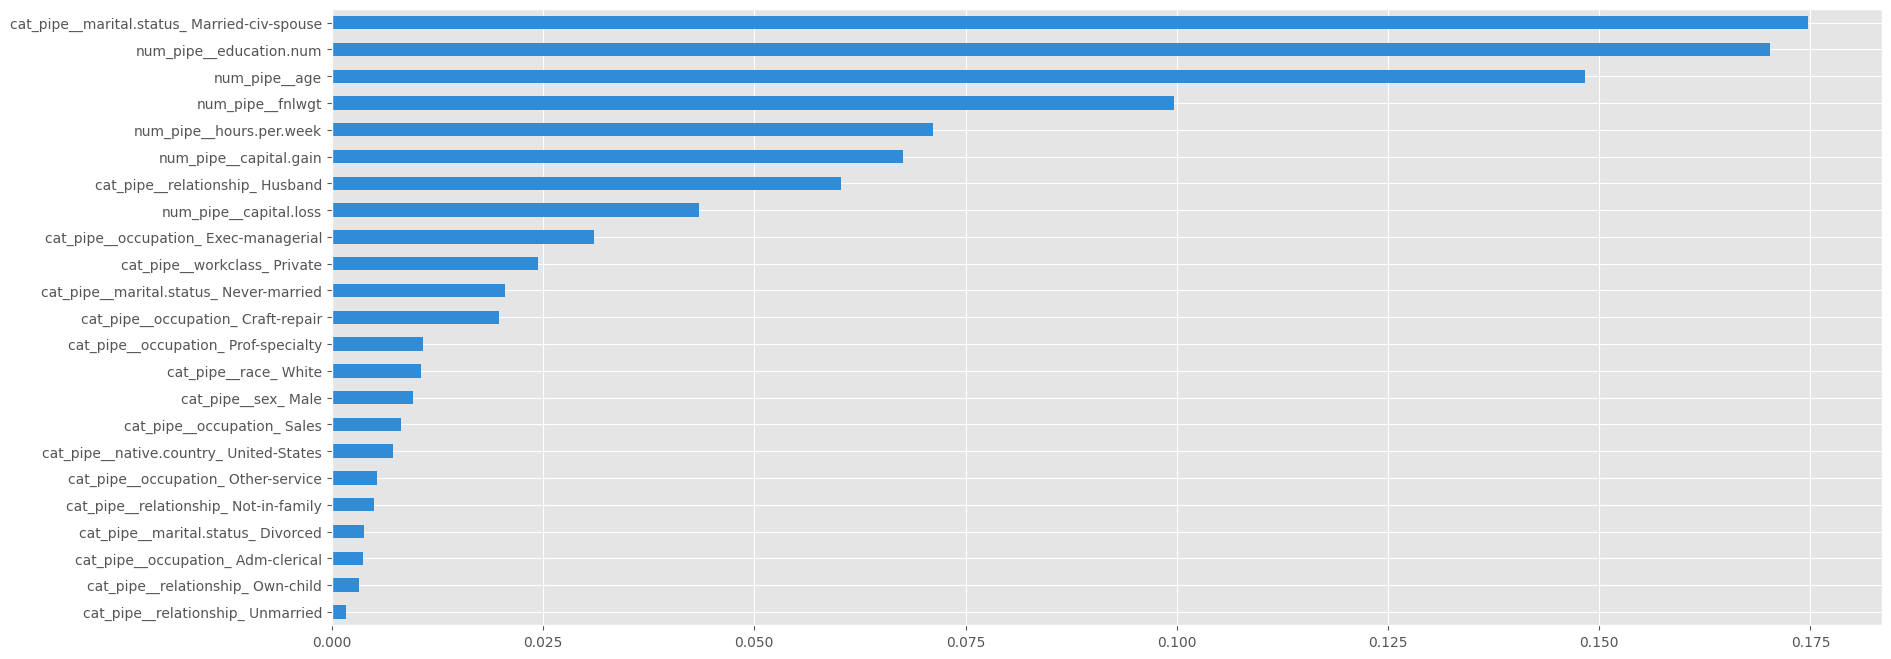

In [16]:
interpreter=Interpretation(x,feature_names=x.columns)
model=InMemoryModel(rf.predict_proba,examples=x)
plots=interpreter.feature_importance.plot_feature_importance(model,ascending=True)

In [17]:
pyint_model=InMemoryModel(rf.predict_proba,examples=x,target_names=['Y_0','Y_1'])
axes_list=interpreter.partial_dependence.plot_partial_dependence(['num_pipe__education.num'],
                                                                pyint_model,
                                                                grid_resolution=30,
                                                                with_variance=True,
                                                                figsize=(10,5))

MatplotlibUnavailableError: Matplotlib is required but unavailable on your system.

In [ ]:
!pip install matplotlib

In [ ]:
from matplotlib.axes._subplots import Axes as mpl_axes

In [ ]:
!pip install matplotlib.axes._subplots